In [3]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
titanic_df = pd.read_csv('titanic.csv')

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",male,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",male,26,0,0,STON/O2. 3101282,7.9250,C86,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",male,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,C124,S


In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.613917,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.604493,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,39.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
columns = list(titanic_df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

def describe_data(data, col):
    print ('\n\n', col)
    print ('_' * 40)
    print ('Mean:', np.mean(data)) #NumPy Mean
    print ('STD:', np.std(data))   #NumPy STD
    print ('Min:', np.min(data))   #NumPy Min
    print ('Max:', np.max(data))   #NumPy Max

for c in columns:
    describe_data(titanic_df[c], c)




 PassengerId
________________________________________
Mean: 446.0
STD: 257.20938292890224
Min: 1
Max: 891


 Survived
________________________________________
Mean: 0.3838383838383838
STD: 0.48631931786710086
Min: 0
Max: 1


 Pclass
________________________________________
Mean: 2.308641975308642
STD: 0.8356019334795189
Min: 1
Max: 3


 Age
________________________________________
Mean: 29.61391694725028
STD: 14.596295343132244
Min: 0
Max: 80


 SibSp
________________________________________
Mean: 0.5230078563411896
STD: 1.1021244350892836
Min: 0
Max: 8


 Parch
________________________________________
Mean: 0.38159371492704824
STD: 0.8056047612452284
Min: 0
Max: 6


 Fare
________________________________________
Mean: 32.2042079685746
STD: 49.66553444477411
Min: 0.0
Max: 512.3292


In [9]:
titanic_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,889
unique,891,2,681,548,3
top,"Lefebre, Miss. Ida",male,CA. 2343,C125,S
freq,1,734,7,7,644


In [10]:
titanic_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.732484
1,male,0.309264


In [13]:
titanic_df['AgeRange'] = pd.cut(titanic_df['Age'], 16)

# Calculate proportion of surviors for each AgeRange
titanic_df[['AgeRange', 'Survived']].groupby(['AgeRange'], as_index=False).mean().sort_values(by='AgeRange', ascending=True)

,AgeRange,Survived
0,"(-0.08, 5.0]",0.636364
1,"(5.0, 10.0]",0.368421
2,"(10.0, 15.0]",0.526316
3,"(15.0, 20.0]",0.333333
4,"(20.0, 25.0]",0.321637
5,"(25.0, 30.0]",0.364407
6,"(30.0, 35.0]",0.438095
7,"(35.0, 40.0]",0.426966
8,"(40.0, 45.0]",0.358491
9,"(45.0, 50.0]",0.328125


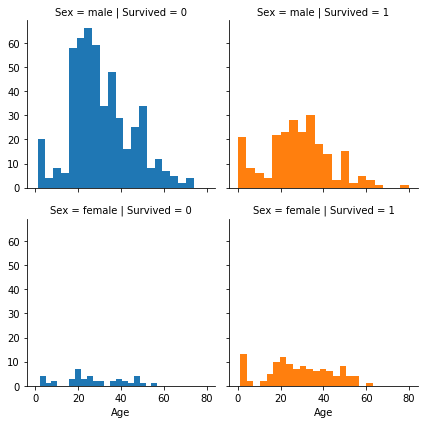

In [14]:
age_sex_hist = sns.FacetGrid(titanic_df, col='Survived', row='Sex', hue='Survived')
age_sex_hist.map(plt.hist, 'Age', bins=20)

In [16]:
titanic_df[['Sex', 'AgeRange', 'Survived']].groupby(['Sex', 'AgeRange'], as_index=False).mean().sort_values(by='AgeRange', ascending=True)

,Sex,AgeRange,Survived
0,female,"(-0.08, 5.0]",0.777778
16,male,"(-0.08, 5.0]",0.583333
17,male,"(5.0, 10.0]",0.400000
1,female,"(5.0, 10.0]",0.250000
18,male,"(10.0, 15.0]",0.357143
2,female,"(10.0, 15.0]",1.000000
3,female,"(15.0, 20.0]",0.750000
19,male,"(15.0, 20.0]",0.263158
4,female,"(20.0, 25.0]",0.636364
20,male,"(20.0, 25.0]",0.246377


[Text(0, 0.5, '% Survivors'), Text(0.5, 0, 'Passenger Class')]

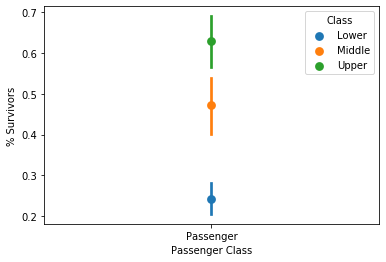

In [17]:
titanic_df['Passenger'] = 'Passenger'
# Create Class column with string values for class
titanic_df['Class'] = titanic_df['Pclass'].map( {1: 'Upper', 2: 'Middle', 3: 'Lower'} )

# Create PointPlot for Passengers by Class
bp = sns.pointplot(x='Passenger', y='Survived', hue='Class', data=titanic_df, hue_order=['Lower', 'Middle', 
                                                                                         'Upper'])
bp.set(ylabel='% Survivors', xlabel='Passenger Class')

[Text(0, 0.5, '% Survivors'), Text(0.5, 0, 'Passenger Sex by Class')]

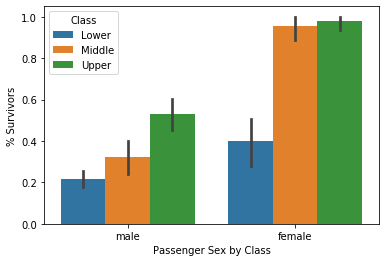

In [18]:
bps = sns.barplot(x='Sex', y='Survived', hue='Class', data=titanic_df, hue_order=['Lower', 'Middle', 'Upper'])
bps.set(ylabel='% Survivors', xlabel='Passenger Sex by Class')

In [19]:
np.corrcoef(x=titanic_df['Pclass'], y=titanic_df['Survived'])

array([[ 1.        , -0.33848104],
       [-0.33848104,  1.        ]])